In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist   #mnist데이터를 불러옴
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # images는 이미지, labels는 종류별로 나눈 클래스

In [ ]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

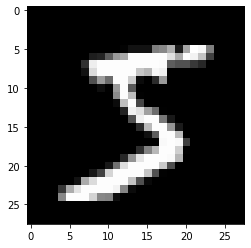

In [ ]:
## <샘플이미지 확인하기> 
## 넘파이 배열의 원소값이 0에 가까울수록 이미지가 검게 그려짐. 
## x_train_all[i] 의 i값을 다양하게 입력해 보세요. 0<=i<=59,999
plt.imshow(train_images[0], cmap='gray') #첫번째 이미지를 흑백으로 출력함 
plt.show()

In [ ]:
## <Target 값 확인하기>
## y_target_all : 60,000개의 요소를 가진 1차원 배열. 각 요소는 0~9까지의 정수로 이루어져 있음. 
## 일단 가장 앞에 있는 10개만 출력함.
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


In [ ]:
## 훈련세트의 목표값들이 고르게 분포되어 있는 지 확인함
## bincount() : 배열에 있는 정수값의 등장횟수를 카운트함.
np.bincount(train_labels)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [ ]:
## 이미지 데이터는 픽셀마다 0~255 사이의 값을 가짐.
## [데이터표준화] 255로 나누어 0~1 사이로 맞추는 것이 유리함.
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
# 2차원배열 (28*28픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원배열로 변환함
model.add(Flatten(input_shape=(28,28)))
## 은닉층을 정의함. 유닛개수 100개
model.add(Dense(100, activation='relu'))
## 출력층을 정의함. 유닛수는 10개
model.add(Dense(15, activation='softmax'))

In [ ]:
## 최적화알고리즘은 adam, 손실함수는 크로스엔트로피, metrics : 훈련과정기록으로 정확도를 남기기 위함.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
## 훈련세트에서 측정한 값들을 History 클래스 객체에 담아서 반환함.
history = model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4737 - accuracy: 0.8702
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1268 - accuracy: 0.9629
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9749
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0635 - accuracy: 0.9813
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0478 - accuracy: 0.9853
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0396 - accuracy: 0.9882
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9904
Epoch 8/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9925
Epoch 9/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0199 - accuracy: 0.9945
Epoch 10/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

In [ ]:
## history 딕셔너리의 측정지표들
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


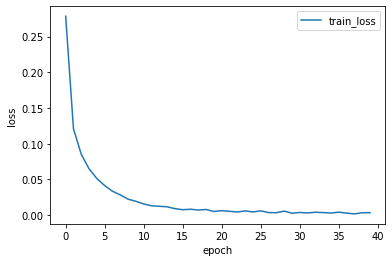

In [ ]:
## 손실 추이
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

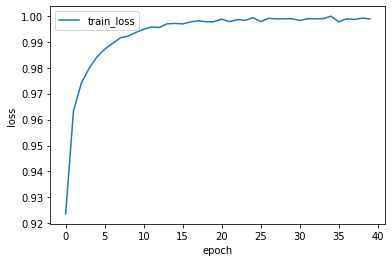

In [ ]:
## 정확도 추이
plt.plot(history.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [ ]:
## Verbosity mode.0 = silent, 1 = progress bar
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

In [ ]:
print(f'테스트 손실도 : {test_loss}')

테스트 손실도 : 0.1406598538160324


In [ ]:
print(f'테스트 정확도 : {test_accuracy}')

테스트 정확도 : 0.9782999753952026
